In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\EoinD\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\EoinD\AppData\Local\Temp\ipykernel_13048\1913599971.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (http

In [2]:
lists = pd.read_csv('listings.csv')
dub_nb =  gpd.read_file('neighbourhoods.geojson')

In [4]:
lists= gpd.GeoDataFrame(
   lists, geometry = gpd.points_from_xy(x = lists.longitude, y = lists.latitude)
)

In [5]:
dub_nb.crs = lists.crs

In [7]:
dub_nb

,neighbourhood,neighbourhood_group,geometry
0,Dublin City,None,"MULTIPOLYGON (((-6.22569 53.41099, -6.22295 53..."
1,South Dublin,None,"MULTIPOLYGON (((-6.41219 53.36780, -6.40812 53..."
2,Fingal,None,"MULTIPOLYGON (((-6.20563 53.46745, -6.20516 53..."
3,Dn Laoghaire-Rathdown,None,"MULTIPOLYGON (((-6.12869 53.29203, -6.12829 53..."


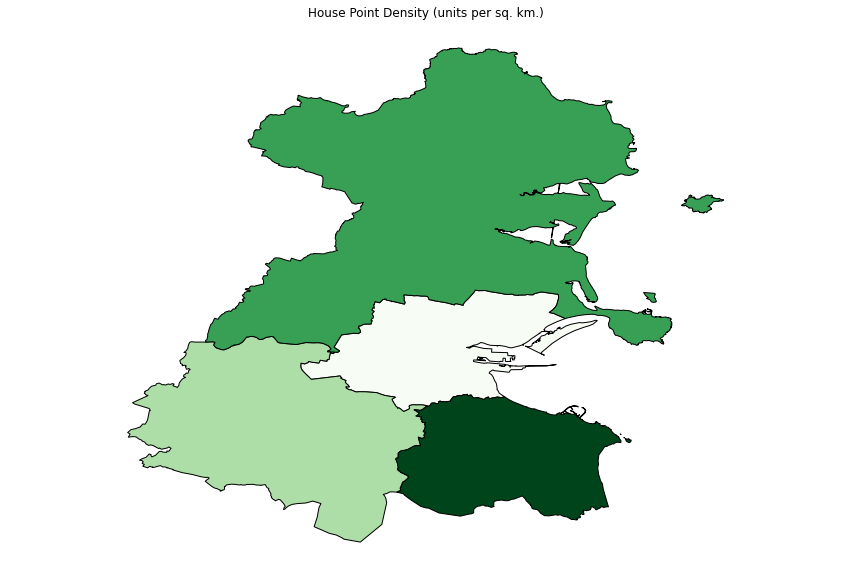

In [9]:
f, ax = plt.subplots(1, figsize=(15, 10)) #Subplots allows you to draw multiple plots in one figure
dub_nb.plot(ax=ax,cmap='Greens', edgecolor='Black')
ax.set_axis_off() #Remove axes from plot 
ax.set_title('House Point Density (units per sq. km.)') #Plot title text
plt.axis('equal') #Set x and y axes to be equal size
plt.show()

In [32]:
test = gpd.sjoin(dub_nb, lists, how = "inner", predicate = "contains")

In [35]:
test2 = gpd.GeoDataFrame(pd.concat([lists, dub_nb], ignore_index=True))

In [36]:
test2['geometry']

0                               POINT (-6.22553 53.45891)
1                               POINT (-6.24719 53.30650)
2                               POINT (-6.24891 53.34169)
3                               POINT (-6.25937 53.35815)
4                               POINT (-6.25722 53.35432)
                              ...                        
4733                            POINT (-6.31522 53.34133)
4734    MULTIPOLYGON (((-6.22569 53.41099, -6.22295 53...
4735    MULTIPOLYGON (((-6.41219 53.36780, -6.40812 53...
4736    MULTIPOLYGON (((-6.20563 53.46745, -6.20516 53...
4737    MULTIPOLYGON (((-6.12869 53.29203, -6.12829 53...
Name: geometry, Length: 4738, dtype: geometry

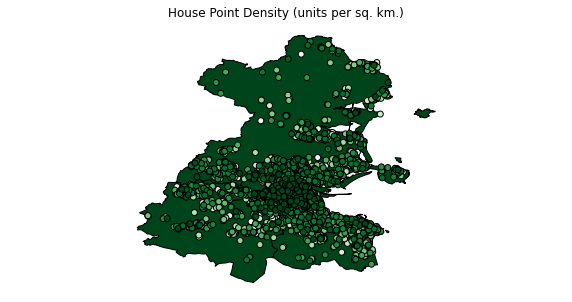

In [40]:
f, ax = plt.subplots(1, figsize=(10, 5)) #Subplots allows you to draw multiple plots in one figure
test2.plot(ax=ax,cmap='Greens', edgecolor='Black')
ax.set_axis_off() #Remove axes from plot 
ax.set_title('House Point Density (units per sq. km.)') #Plot title text
plt.axis('equal') #Set x and y axes to be equal size
plt.show()

In [53]:
# Create GeoDataFrames
lists = gpd.GeoDataFrame({'geometry': lists, 'Type': ['point']})
dub_nb = gpd.GeoDataFrame({'geometry': [dub_nb], 'Type': ['multipolygon']})

# Combine into one GeoDataFrame

#test2 = gpd.GeoDataFrame(pd.concat([lists, dub_nb], ignore_index=True))

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)